# Case A3Data - Jefferson Lee Chan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import fbeta_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay, classification_report,\
    precision_recall_curve, PrecisionRecallDisplay, average_precision_score, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

pd.set_option('max_colwidth', 100)
pd.set_option('display.max_columns', 21)

## EDA

In [2]:
df = pd.read_csv('Customer-Churn - Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [4]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace(',', '.').astype(float)
df['TotalCharges'] = df['TotalCharges'].str.replace(',', '.').astype(float)

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop('customerID', axis=1, inplace=True)

In [7]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2531,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
3343,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
4023,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
4315,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
4583,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5484,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
5549,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
6213,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
6429,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
6562,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No


In [9]:
df[df['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2531,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
3343,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
4023,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
4315,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
4583,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5484,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
5549,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
6213,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
6429,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
6562,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No


In [10]:
# Observando que tenure = 0 se, e somente se, TotalCharges = NaN, então assumimos que se tratam de novos clientes, e portanto "NaN = 0"
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [11]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.apply(lambda x: x.unique())

gender                                                                                                   [Female, Male]
SeniorCitizen                                                                                                    [0, 1]
Partner                                                                                                       [Yes, No]
Dependents                                                                                                    [Yes, No]
tenure              [72, 71, 68, 61, 67, 48, 60, 70, 55, 66, 34, 69, 56, 45, 54, 62, 64, 43, 41, 50, 59, 47, 35, 57,...
PhoneService                                                                                                  [Yes, No]
MultipleLines                                                                               [Yes, No, No phone service]
InternetService                                                                                  [Fiber optic, DSL, No]
OnlineSecurity                          

In [13]:
no_service = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
              'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in no_service:
    df[col] = df[col].str.replace(r'No [a-z]+ service', 'No', regex=True)

df['SeniorCitizen']= df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [14]:
df.apply(lambda x: x.unique())

gender                                                                                                   [Female, Male]
SeniorCitizen                                                                                                 [No, Yes]
Partner                                                                                                       [Yes, No]
Dependents                                                                                                    [Yes, No]
tenure              [72, 71, 68, 61, 67, 48, 60, 70, 55, 66, 34, 69, 56, 45, 54, 62, 64, 43, 41, 50, 59, 47, 35, 57,...
PhoneService                                                                                                  [Yes, No]
MultipleLines                                                                                                 [Yes, No]
InternetService                                                                                  [Fiber optic, DSL, No]
OnlineSecurity                          

In [15]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

df[cat_cols].describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,2,No,4072
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,2,No,5024
OnlineBackup,7043,2,No,4614
DeviceProtection,7043,2,No,4621


In [16]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [17]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

A distribuição de Churn é desbalanceada, portanto será necessário aplicar uma técnica de balanceamento de dados.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1),
                                                    df['Churn'],
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=df['Churn'])

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [19]:
sns.set_palette('muted')

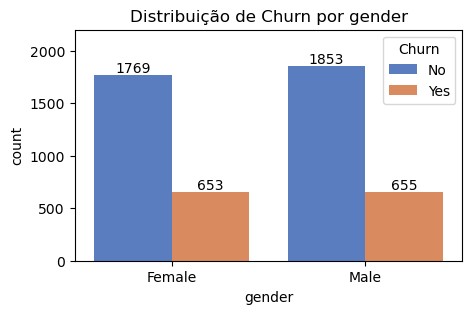

In [20]:
fig = plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df_train, x='gender', hue='Churn')
plt.bar_label(container=ax.containers[0], label_type='edge')
plt.bar_label(container=ax.containers[1], label_type='edge')
plt.ylim(0, 2200)
plt.title('Distribuição de Churn por gender');

A distribuição de Churn é muito similar entre clientes com gender Female e Male.

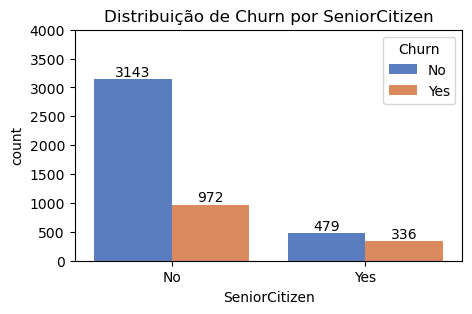

In [21]:
fig = plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df_train, x='SeniorCitizen', hue='Churn')
ax.bar_label(container=ax.containers[0], label_type='edge')
ax.bar_label(container=ax.containers[1], label_type='edge')
ax.set_ylim(0, 4000)
ax.set_title('Distribuição de Churn por SeniorCitizen');

A quantidade total de clientes SeniorCitizen é consideravelmente baixa. Para essa categoria de clientes, a quantidade de Churn é 336 de um total de 815, o que representa uma taxa de Churn de 41,2% para clientes SeniorCitizen. Estes são relativamente mais propensos a Churn do que clientes não-SeniorCitizen.

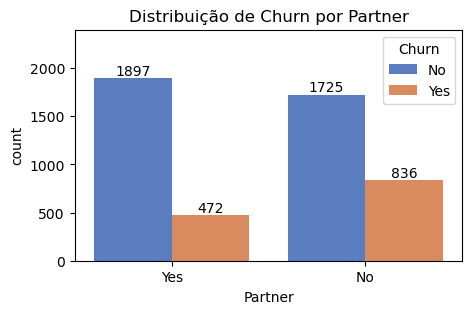

In [22]:
fig = plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df_train, x='Partner', hue='Churn')
plt.bar_label(container=ax.containers[0], label_type='edge')
plt.bar_label(container=ax.containers[1], label_type='edge')
plt.ylim(0, 2400)
plt.title('Distribuição de Churn por Partner');

Para clientes sem Partner, a quantidade de Churn é 836 de um total de 2561, o que representa uma taxa de Churn de 32,6% para essa categoria de clientes. Estes são relativamente mais propensos a Churn do que clientes com Partner.

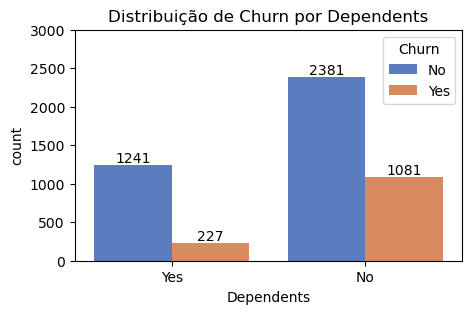

In [23]:
fig = plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df_train, x='Dependents', hue='Churn')
plt.bar_label(container=ax.containers[0], label_type='edge')
plt.bar_label(container=ax.containers[1], label_type='edge')
plt.ylim(0, 3000)
plt.title('Distribuição de Churn por Dependents');

Para clientes sem Dependents, a quantidade de Churn é 1081 de um total de 3642, o que representa uma taxa de Churn de 29,7% para essa categoria de clientes. Estes são relativamente mais propensos a Churn do que clientes com Dependents.

In [ ]:
df_train[['Partner', 'Dependents', 'Churn']].pivot_table(index='Partner',
                                                         columns='Dependents',
                                                         values='Churn',
                                                         aggfunc='count')

Dependents,No,Yes
Partner,,
No,2303,258
Yes,1159,1210


In [77]:
s = 2303+258+1159+1210
2303/s

0.46713995943204867

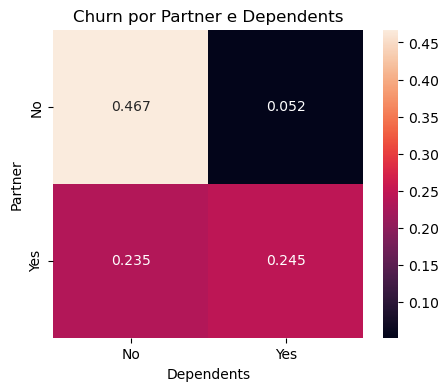

In [118]:
partner_dependents = df_train.pivot_table(index='Partner', columns='Dependents', values='Churn', aggfunc='count')
partner_dependents_pct = partner_dependents.map(lambda x: x/partner_dependents.sum().sum())
plt.figure(figsize=(5, 4))
sns.heatmap(partner_dependents_pct, annot=True, fmt='.3f')
plt.title('Churn por Partner e Dependents');

A taxa de Churn é consideravelmente maior no grupo de clientes sem Partner e Dependents.

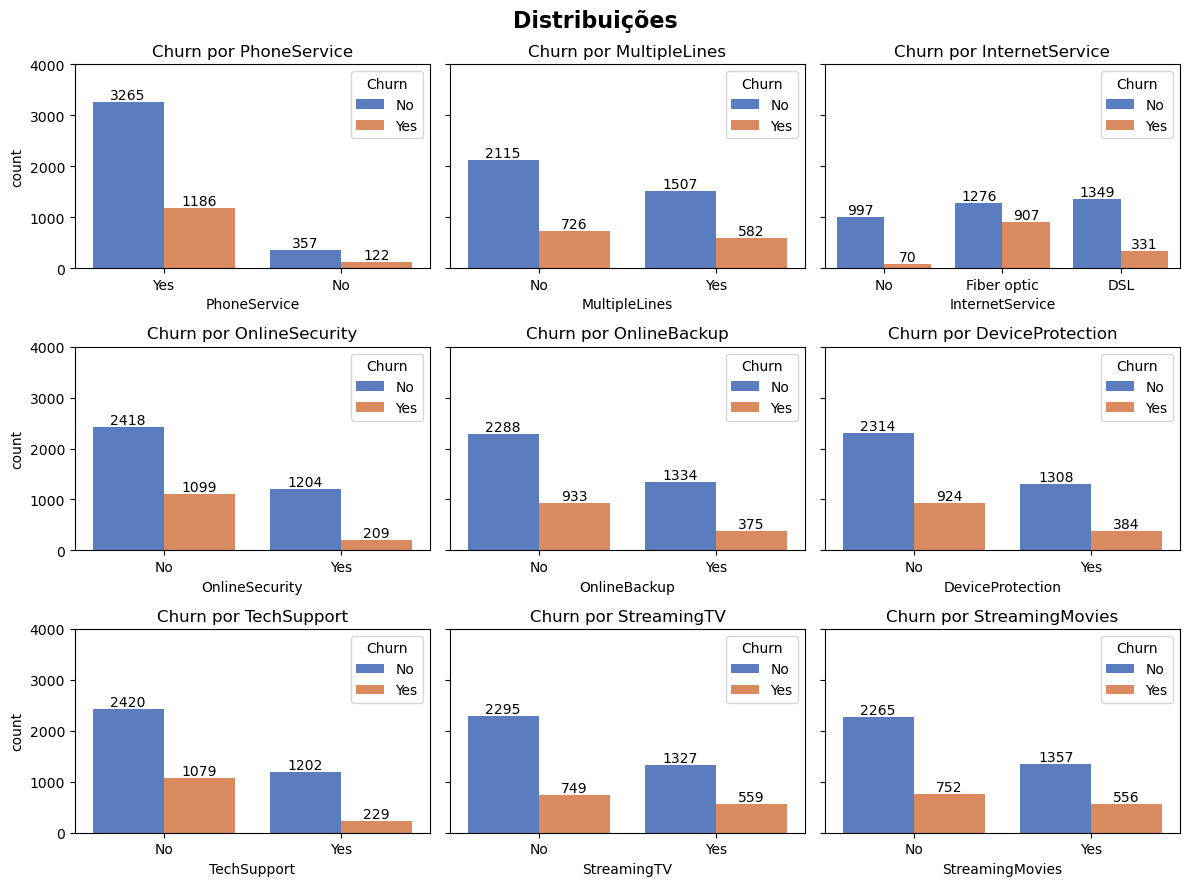

In [24]:
services = [['PhoneService', 'MultipleLines', 'InternetService'],
            ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection'],
            ['TechSupport', 'StreamingTV', 'StreamingMovies']]

fig, ax = plt.subplots(3, 3, figsize=(12, 9), sharey=True)
fig.suptitle("Distribuições", fontsize=16, fontweight='bold')
for row in range(3):
    for col in range(3):
        sns.countplot(data=df_train, x=services[row][col], hue='Churn', ax=ax[row, col])
        ax[row, col].bar_label(container=ax[row, col].containers[0], label_type='edge')
        ax[row, col].bar_label(container=ax[row, col].containers[1], label_type='edge')
        ax[row, col].set_ylim(0, 4000)
        ax[row, col].set_title(f"Churn por {services[row][col]}")
plt.tight_layout();

- A taxa de Churn independe da contratação dos serviços de PhoneService, MultipleLines, OnlineBackup ou DeviceProtection.


- Clientes sem OnlineSecurity ou TechSupport são relativamente mais propensos a Churn.
    - Para clientes sem OnlineSecurity, a quantidade de Churn é 1099 de um total de 3517, o que representa uma taxa de Churn de 31,2% para essa categoria de clientes.


    - Para clientes sem TechSupport, a quantidade de Churn é 1079 de um total de 3499, o que representa uma taxa de Churn de 30,8% para essa categoria de clientes.

    
- Clientes com InternetService "Fiber optic", StreamingTV ou StreamingMovies são relativamente mais propensos a Churn.
    - Para clientes com InternetService "Fiber optic", a quantidade de Churn é 907 de um total de 2183, o que representa uma taxa de Churn de 41,5% para essa categoria de clientes.


    - Para clientes com StreamingTV, a quantidade de Churn é 559 de um total de 1886, o que representa uma taxa de Churn de 29,6% para essa categoria de clientes.

    
    - Para clientes com StreamingMovies, a quantidade de Churn é 556 de um total de 1913, o que representa uma taxa de Churn de 29,1% para essa categoria de clientes.

In [113]:
df_train.replace({'InternetService': {'DSL': 'Yes', 'Fiber optic': 'Yes'}})['InternetService']

5860     No
1818    Yes
6681     No
2516    Yes
840     Yes
       ... 
4606    Yes
1639    Yes
6452     No
3058    Yes
5922     No
Name: InternetService, Length: 4930, dtype: object

InternetService,No,Yes
PhoneService,,
No,NaN,479.0
Yes,1067.0,3384.0


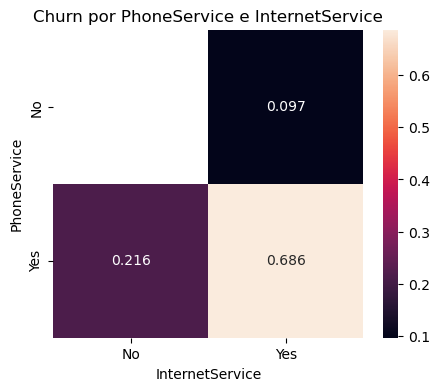

In [127]:
phone_internet = df_train[['PhoneService', 'InternetService', 'Churn']]
repl_dict = {'InternetService': {'DSL': 'Yes', 'Fiber optic': 'Yes'}}
phone_internet_enc = phone_internet.replace(repl_dict).pivot_table(index='PhoneService',
                                                                   columns='InternetService',
                                                                   values='Churn',
                                                                   aggfunc='count')
phone_internet_pct = phone_internet_enc.map(lambda x: x/phone_internet_enc.sum().sum())
plt.figure(figsize=(5, 4))
sns.heatmap(phone_internet_pct, annot=True, fmt='.3f')
plt.title('Churn por PhoneService e InternetService')

phone_internet_enc

A taxa de Churn é consideravelmente maior no grupo de clientes com PhoneService e InternetService.

TechSupport,No,Yes
OnlineSecurity,,
No,2853,664
Yes,646,767


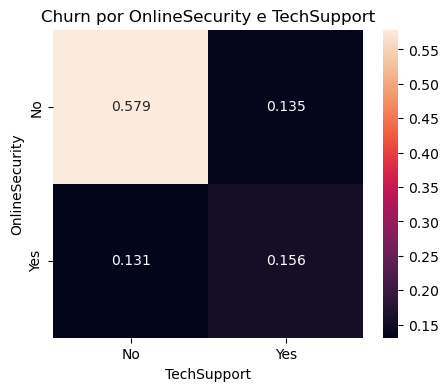

In [126]:
security_support = df_train.pivot_table(index='OnlineSecurity',
                                        columns='TechSupport',
                                        values='Churn',
                                        aggfunc='count')
security_support_pct = security_support.map(lambda x: x/security_support.sum().sum())
plt.figure(figsize=(5, 4))
sns.heatmap(security_support_pct, annot=True, fmt='.3f')
plt.title('Churn por OnlineSecurity e TechSupport')

security_support

A taxa de Churn é consideravelmente maior no grupo de clientes sem OnlineSecurity e TechSupport.

DeviceProtection,No,Yes
OnlineBackup,,
No,2455,766
Yes,783,926


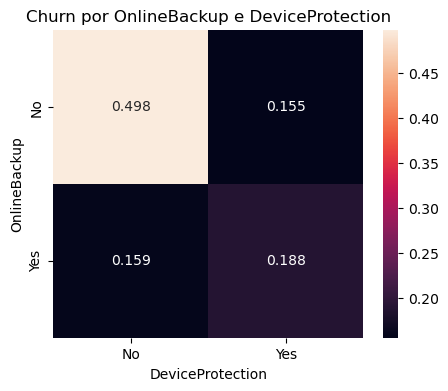

In [128]:
backup_protection = df_train.pivot_table(index='OnlineBackup',
                                        columns='DeviceProtection',
                                        values='Churn',
                                        aggfunc='count')
backup_protection_pct = backup_protection.map(lambda x: x/backup_protection.sum().sum())
plt.figure(figsize=(5, 4))
sns.heatmap(backup_protection_pct, annot=True, fmt='.3f')
plt.title('Churn por OnlineBackup e DeviceProtection')

backup_protection

A taxa de Churn é consideravelmente maior no grupo de clientes sem OnlineBackup e DeviceProtecion.

StreamingMovies,No,Yes
StreamingTV,,
No,2496,548
Yes,521,1365


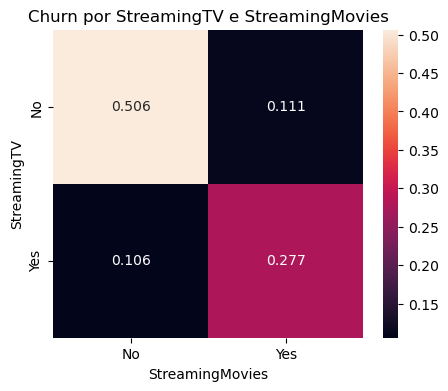

In [129]:
streaming = df_train.pivot_table(index='StreamingTV',
                                 columns='StreamingMovies',
                                 values='Churn',
                                 aggfunc='count')
streaming_pct = streaming.map(lambda x: x/streaming.sum().sum())
plt.figure(figsize=(5, 4))
sns.heatmap(streaming_pct, annot=True, fmt='.3f')
plt.title('Churn por StreamingTV e StreamingMovies')

streaming

A taxa de Churn é consideravelmente maior no grupo de clientes sem StreamingTv e StreamingMovies.

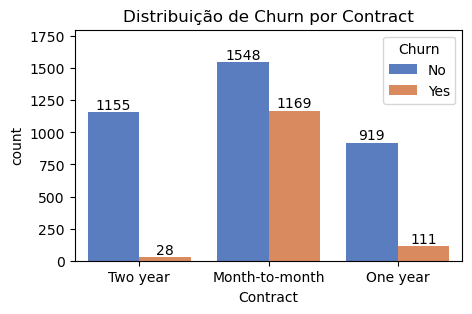

In [25]:
fig = plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df_train, x='Contract', hue='Churn')
plt.bar_label(container=ax.containers[0], label_type='edge')
plt.bar_label(container=ax.containers[1], label_type='edge')
plt.ylim(0, 1800)
plt.title('Distribuição de Churn por Contract');

Para clientes com Contract Month-to-month, a quantidade de Churn é 1169 de um total de 2717, o que representa uma taxa de Churn de 43% para essa categoria de clientes. Estes são relativamente mais propensos a Churn do que clientes com Contract "Two year" ou "One year".

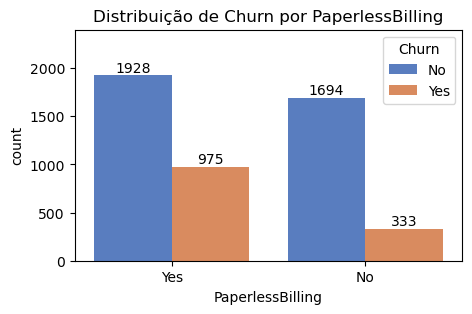

In [26]:
fig = plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df_train, x='PaperlessBilling', hue='Churn')
plt.bar_label(container=ax.containers[0], label_type='edge')
plt.bar_label(container=ax.containers[1], label_type='edge')
plt.ylim(0, 2400)
plt.title('Distribuição de Churn por PaperlessBilling');

Para clientes com PaperlessBilling, a quantidade de Churn é 975 de um total de 2903, o que representa uma taxa de Churn de 33,6% para essa categoria de clientes. Estes são relativamente mais propensos a Churn do que clientes sem PaperlessBilling.

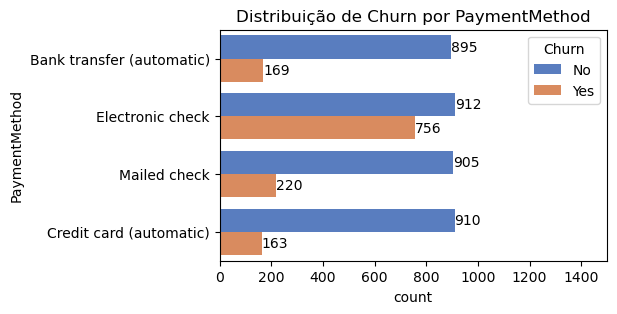

In [27]:
fig = plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df_train, y='PaymentMethod', hue='Churn', orient='h')
plt.bar_label(container=ax.containers[0], label_type='edge')
plt.bar_label(container=ax.containers[1], label_type='edge')
plt.xlim(0, 1500)
plt.title('Distribuição de Churn por PaymentMethod');

Para clientes com PaymentMethod "Electronic check", a quantidade de Churn é 756 de um total de 1668, o que representa uma taxa de Churn de 45,3% para essa categoria de clientes. Estes são relativamente mais propensos a Churn do que clientes com os demais tipos de PaymentMethod.

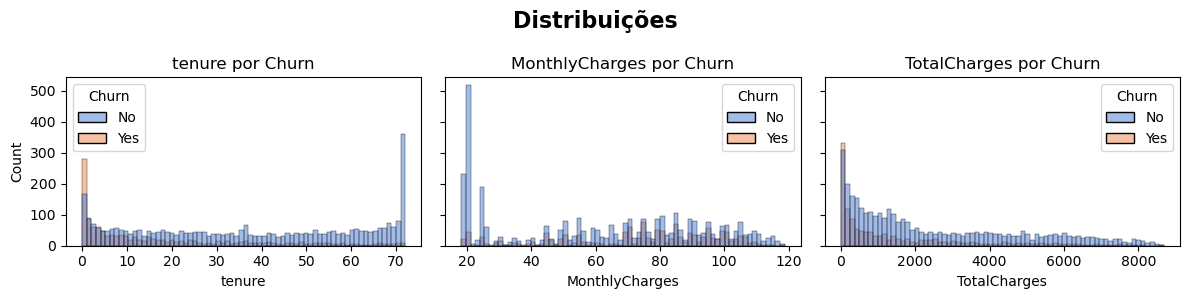

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
fig.suptitle("Distribuições", fontsize=16, fontweight='bold')
sns.histplot(data=df_train, x='tenure', bins=70, hue='Churn', ax=ax[0])
ax[0].set_title('tenure por Churn')
sns.histplot(data=df_train, x='MonthlyCharges', bins=70, hue='Churn', ax=ax[1])
ax[1].set_title('MonthlyCharges por Churn')
sns.histplot(data=df_train, x='TotalCharges', bins=70, hue='Churn', ax=ax[2])
ax[2].set_title('TotalCharges por Churn')
fig.tight_layout();

Ambas as distribuições de tenure e TotalCharges para clientes com Churn positivo apresentam assimetria à direita, portanto a maioria desses clientes concentra-se à esquerda dessas distribuições, ou seja, clientes propensos a Churn estão associados a valores mais baixos de tenure e TotalCharges. Ademais, a distribuição de MonthlyCharges para clientes com Churn positivo tende a se concentrar na faixa de valores de MonthlyCharges entre 70 e 110, aproximadamente.

## Data Preprocessing & Feature Engineering

In [29]:
ohe = OneHotEncoder(drop='first', dtype=int, sparse_output=False)
ohe.fit(df_train[cat_cols])
df_train_ohe = pd.DataFrame(ohe.transform(df_train[cat_cols]), columns=ohe.get_feature_names_out())
df_test_ohe = pd.DataFrame(ohe.transform(df_test[cat_cols]), columns=ohe.get_feature_names_out())

X_train = pd.concat([df_train_ohe, df_train[num_cols].reset_index(drop=True)], axis=1)
X_test = pd.concat([df_test_ohe, df_test[num_cols].reset_index(drop=True)], axis=1)

y_train = df_train['Churn'].map({'Yes': 1, 'No': 0})
y_test = df_test['Churn'].map({'Yes': 1, 'No': 0})

In [30]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## Model Building

In [31]:
f2_score = make_scorer(fbeta_score, beta=2)

### Logistic Regression (Benchmark)

In [32]:
lr = LogisticRegression(class_weight='balanced')
lr_clf = GridSearchCV(lr,
                      param_grid={'C': np.logspace(-4, 4, num=10)},
                      scoring=f2_score,
                      n_jobs=-1,
                      cv=5,
                      return_train_score=True)
lr_clf.fit(X_train, y_train)

print('train f2-score:', f'{100*lr_clf.cv_results_['mean_train_score'][lr_clf.best_index_]:.3f}%')
print('valid f2-score:', f'{100*lr_clf.cv_results_['mean_test_score'][lr_clf.best_index_]:.3f}%')

train f2-score: 73.044%
valid f2-score: 72.762%


### Support Vector Machine

In [33]:
svm = SVC(class_weight='balanced')
svm_clf = GridSearchCV(svm,
                       param_grid={'C': np.logspace(-4, 4, num=10)},
                       scoring=f2_score,
                       n_jobs=-1,
                       cv=5,
                       return_train_score=True)
svm_clf.fit(X_train, y_train)

print('train f2-score:', f'{100*svm_clf.cv_results_['mean_train_score'][svm_clf.best_index_]:.3f}%')
print('valid f2-score:', f'{100*svm_clf.cv_results_['mean_test_score'][svm_clf.best_index_]:.3f}%')

train f2-score: 74.912%
valid f2-score: 72.078%


### Random Forest

In [34]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
parameters = {'n_estimators': [100, 200, 500, 1000, 10000],
              'criterion': ['gini', 'entropy', 'log_loss'],
              'min_samples_split': [2**x for x in range(1, 6)],
              'max_features': ['sqrt', 'log2', None],
              'max_samples': np.linspace(0.2, 1, 5)}
rf_clf = RandomizedSearchCV(rf,
                            param_distributions=parameters,
                            scoring=f2_score,
                            n_jobs=-1,
                            cv=5,
                            random_state=42,
                            return_train_score=True)
rf_clf.fit(X_train, y_train)

print('train f2-score:', f'{100*rf_clf.cv_results_['mean_train_score'][rf_clf.best_index_]:.3f}%')
print('valid f2-score:', f'{100*rf_clf.cv_results_['mean_test_score'][rf_clf.best_index_]:.3f}%')

train f2-score: 78.806%
valid f2-score: 69.819%


### CatBoost

In [35]:
cat = CatBoostClassifier(auto_class_weights='Balanced', verbose=False, random_state=42)
parameters = {'n_estimators': [100, 200, 500, 1000],
              'learning_rate': [0.1, 0.05, 0.01, 0.005],
              'reg_lambda': [0.1, 0.5, 1, 3, 5],
              'subsample': [0.2, 0.4, 0.6, 0.8, 1],
              'score_function': ['Cosine', 'L2'],
              'min_child_samples': [2**x for x in range(6)]}
cat_clf = RandomizedSearchCV(cat,
                             param_distributions=parameters,
                             scoring=f2_score,
                             n_jobs=-1,
                             cv=5,
                             random_state=42,
                             return_train_score=True)
cat_clf.fit(X_train, y_train)

print('train f2-score:', f'{100*cat_clf.cv_results_['mean_train_score'][cat_clf.best_index_]:.3f}%')
print('valid f2-score:', f'{100*cat_clf.cv_results_['mean_test_score'][cat_clf.best_index_]:.3f}%')

train f2-score: 74.587%
valid f2-score: 72.730%


### LightGBM

In [36]:
lgbm = LGBMClassifier(class_weight='balanced', verbose=-1, random_state=42, n_jobs=-1)
parameters = {'n_estimators': [100, 200, 500, 1000],
              'learning_rate': [0.1, 0.05, 0.01, 0.005],
              'reg_lambda': [0.1, 0.5, 1, 3, 5],
              'reg_alpha': [0.1, 0.5, 1, 3, 5],
              'subsample': [0.2, 0.4, 0.6, 0.8, 1],
              'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1],
              'min_child_samples': [2**x for x in range(6)]}
lgbm_clf = RandomizedSearchCV(lgbm,
                              param_distributions=parameters,
                              scoring=f2_score,
                              n_jobs=-1,
                              cv=5,
                              random_state=42,
                              return_train_score=True)
lgbm_clf.fit(X_train, y_train)

print('train f2-score:', f'{100*lgbm_clf.cv_results_['mean_train_score'][lgbm_clf.best_index_]:.3f}%')
print('valid f2-score:', f'{100*lgbm_clf.cv_results_['mean_test_score'][lgbm_clf.best_index_]:.3f}%')

train f2-score: 76.399%
valid f2-score: 71.926%


### XGBoost

In [37]:
xgb = XGBClassifier(scale_pos_weight=sum(y_train == 0)/sum(y_train == 1), verbosity=0, random_state=42, n_jobs=-1)
parameters = {'n_estimators': [100, 200, 500, 1000],
              'learning_rate': [0.1, 0.05, 0.01, 0.005],
              'reg_lambda': [0.1, 0.5, 1, 3, 5],
              'reg_alpha': [0.1, 0.5, 1, 3, 5],
              'subsample': [0.2, 0.4, 0.6, 0.8, 1],
              'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1],
              'colsample_bylevel': [0.2, 0.4, 0.6, 0.8, 1],
              'colsample_bynode': [0.2, 0.4, 0.6, 0.8, 1],
              'min_child_samples': [2**x for x in range(6)]}
xgb_clf = RandomizedSearchCV(xgb,
                             param_distributions=parameters,
                             scoring=f2_score,
                             n_jobs=-1,
                             cv=5,
                             random_state=42,
                             return_train_score=True)
xgb_clf.fit(X_train, y_train)

print('train f2-score:', f'{100*xgb_clf.cv_results_['mean_train_score'][xgb_clf.best_index_]:.3f}%')
print('valid f2-score:', f'{100*xgb_clf.cv_results_['mean_test_score'][xgb_clf.best_index_]:.3f}%')

train f2-score: 75.748%
valid f2-score: 72.025%


### Stacking

In [38]:
clfs = [('lr', LogisticRegression(class_weight='balanced',
                                  **lr_clf.best_params_)),
        ('svc', SVC(class_weight='balanced',
                    **svm_clf.best_params_)),
        ('rf', RandomForestClassifier(class_weight='balanced',
                                      random_state=42,
                                      **rf_clf.best_params_)),
        ('cat', CatBoostClassifier(auto_class_weights='Balanced',
                                   verbose=False,
                                   random_state=42,
                                   **cat_clf.best_params_)),
        ('lgbm', LGBMClassifier(class_weight='balanced',
                                verbose=-1,
                                random_state=42,
                                n_jobs=-1,
                                **lgbm_clf.best_params_)),
        ('xgb', XGBClassifier(scale_pos_weight=sum(y_train == 0)/sum(y_train == 1),
                              verbosity=0,
                              random_state=42,
                              n_jobs=-1,
                              **xgb_clf.best_params_))]
stack = StackingClassifier(estimators=clfs, final_estimator=LogisticRegression(class_weight='balanced'))
stack_clf = GridSearchCV(stack,
                         param_grid={'final_estimator__C': np.logspace(-5, 5, num=10)},
                         scoring=f2_score,
                         n_jobs=-1,
                         cv=5,
                         return_train_score=True)
stack_clf.fit(X_train, y_train)

print('train f2-score:', f'{100*stack_clf.cv_results_['mean_train_score'][stack_clf.best_index_]:.3f}%')
print('valid f2-score:', f'{100*stack_clf.cv_results_['mean_test_score'][stack_clf.best_index_]:.3f}%')

train f2-score: 74.514%
valid f2-score: 73.373%


## Model Evaluation

In [39]:
final_clf = stack_clf

In [40]:
print(f'test f2-score: {100*fbeta_score(y_test, final_clf.predict(X_test), beta=2):.3f}%')

test f2-score: 71.865%


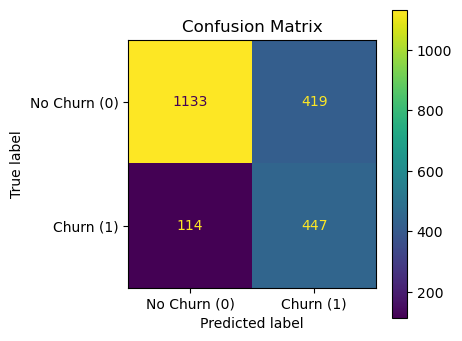

In [41]:
cm = confusion_matrix(y_test, final_clf.predict(X_test))
cm_disp = ConfusionMatrixDisplay(cm, display_labels=['No Churn (0)', 'Churn (1)'])

fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Confusion Matrix')
cm_disp.plot(ax=ax);

In [42]:
fnr = cm[1][0]/(cm[1][0]+cm[1][1])
print(f'false negative rate: {100*fnr:.3f}%')

false negative rate: 20.321%


In [43]:
print(classification_report(y_test, final_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.52      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



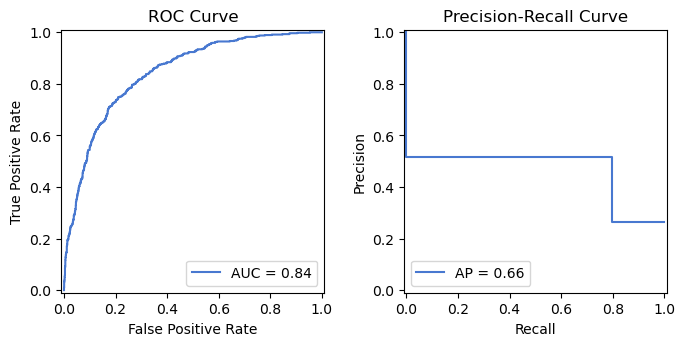

In [44]:
precision, recall, _ = precision_recall_curve(y_test, final_clf.predict(X_test))
ap_score = average_precision_score(y_test, final_clf.predict_proba(X_test)[:, 1])
pr_disp = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=ap_score)

fpr, tpr, _ = roc_curve(y_test, final_clf.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, final_clf.predict_proba(X_test)[:, 1])
roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

fig, ax = plt.subplots(1, 2, figsize=(7, 4))
ax[0].set_title('ROC Curve')
ax[1].set_title('Precision-Recall Curve')
roc_disp.plot(ax=ax[0])
pr_disp.plot(ax=ax[1])
fig.tight_layout();